In [1]:
pip install pandas numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install pandas numpy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import string

In [4]:
dataset = pd.read_csv("train.csv")

In [5]:
dataset

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [6]:
dataset.isnull()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
24778,False,False,False,False,False,False
24779,False,False,False,False,False,False
24780,False,False,False,False,False,False
24781,False,False,False,False,False,False


In [7]:
dataset.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [9]:
dataset.describe()

,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [10]:
dataset["labels"] = dataset["class"].map({0: "hate_speech_count",
                                         1: "offensive_language_count",
                                         2: "No hate or offensive language"})

In [11]:
dataset

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,labels
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive_language_count
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive_language_count
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive_language_count
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive_language_count
...,...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive_language_count
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,offensive_language_count
24781,6,0,6,0,1,youu got wild bitches tellin you lies,offensive_language_count


In [12]:
data = dataset[["tweet", "labels"]]

In [13]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive_language_count
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive_language_count
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive_language_count
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive_language_count
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive_language_count
24779,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive_language_count
24781,youu got wild bitches tellin you lies,offensive_language_count


In [14]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\addep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
import re
# import nltk
# Removol of stop words and stemming the words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stopwords = set(stopwords.words("english"))

In [17]:
# Import stemming
stemmer = nltk.SnowballStemmer("english")

In [18]:
def clean_data(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r"https?://\S+|www\.\S+", "", text)  # Remove URLs
    text = re.sub(r'\[.*?\]', '', text)  # Remove text inside brackets
    text = re.sub(r"<.*?>+", '', text)  # Remove HTML tags
    text = re.sub(r"[%s]" % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', ' ', text)  # Remove newlines
    text = re.sub(r'\d+', '', text)  # Remove numbers

    # Tokenization
    words = text.split()

    # Stopword removal
    words = [word for word in words if word not in stopwords]

    # Stemming
    words = [stemmer.stem(word) for word in words]

    # Convert list back to string
    text = " ".join(words)

    return text

In [19]:
data["tweet"] = data["tweet"].apply(clean_data)

C:\Users\addep\AppData\Local\Temp\ipykernel_12308\1832165696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean_data)


In [20]:
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean hou...,No hate or offensive language
1,rt mleew boy dat coldtyga dwn bad cuffin dat h...,offensive_language_count
2,rt urkindofbrand dawg rt sbabylif ever fuck bi...,offensive_language_count
3,rt cganderson vivabas look like tranni,offensive_language_count
4,rt shenikarobert shit hear might true might fa...,offensive_language_count
...,...,...
24778,yous muthafin lie lifeask pearl coreyemanuel r...,offensive_language_count
24779,youv gone broke wrong heart babi drove redneck...,No hate or offensive language
24780,young buck wanna eat dat nigguh like aint fuck...,offensive_language_count
24781,youu got wild bitch tellin lie,offensive_language_count


In [21]:
X = np.array(data["tweet"])
Y = np.array(data["labels"])

In [22]:
X

array(['rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       'rt mleew boy dat coldtyga dwn bad cuffin dat hoe st place',
       'rt urkindofbrand dawg rt sbabylif ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl ntac eileen dahlia beauti color combin pink orang yellow amp white coll'],
      shape=(24783,), dtype=object)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [24]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [25]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 206365 stored elements and shape (24783, 28783)>

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [27]:
# Buliding out ML Model
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [29]:
Y_pred = dt.predict(X_test)

In [30]:
# Confusion matrix and occuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[1202,   30,  147],
       [  49,  154,  262],
       [ 222,  242, 5871]])

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

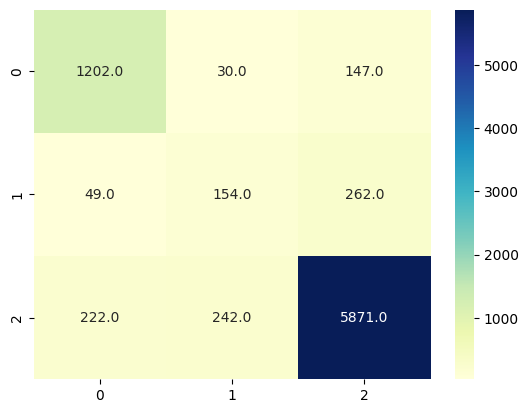

In [32]:
sns.heatmap(cm, annot=True, fmt=".1f", cmap="YlGnBu")

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8836043526103435

In [34]:
sample = "Let's unite and kill all the people who are protesting against the goverment"
sample = clean_data(sample)

In [35]:
sample

'let unit kill peopl protest gover'

In [36]:
data1 = cv.transform([sample]).toarray()

In [37]:
data1

array([[0, 0, 0, ..., 0, 0, 0]], shape=(1, 28783))

In [38]:
dt.predict(data1)

array(['No hate or offensive language'], dtype=object)